The objective is to analyze the screen time patterns of users to identify how notifications and user engagement behaviors influence overall app usage. Specifically, the task is to quantify how turning off notifications for certain apps impacts the overall screen time for helping users reduce unnecessary app usage. By evaluating daily screen time trends, the frequency of app interactions, and the impact of notifications, the goal is to provide actionable insights on how notification settings can influence screen time reduction and healthier device habits.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('screentime_analysis.csv')

In [4]:
data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

### Trends and Mutual Relationships

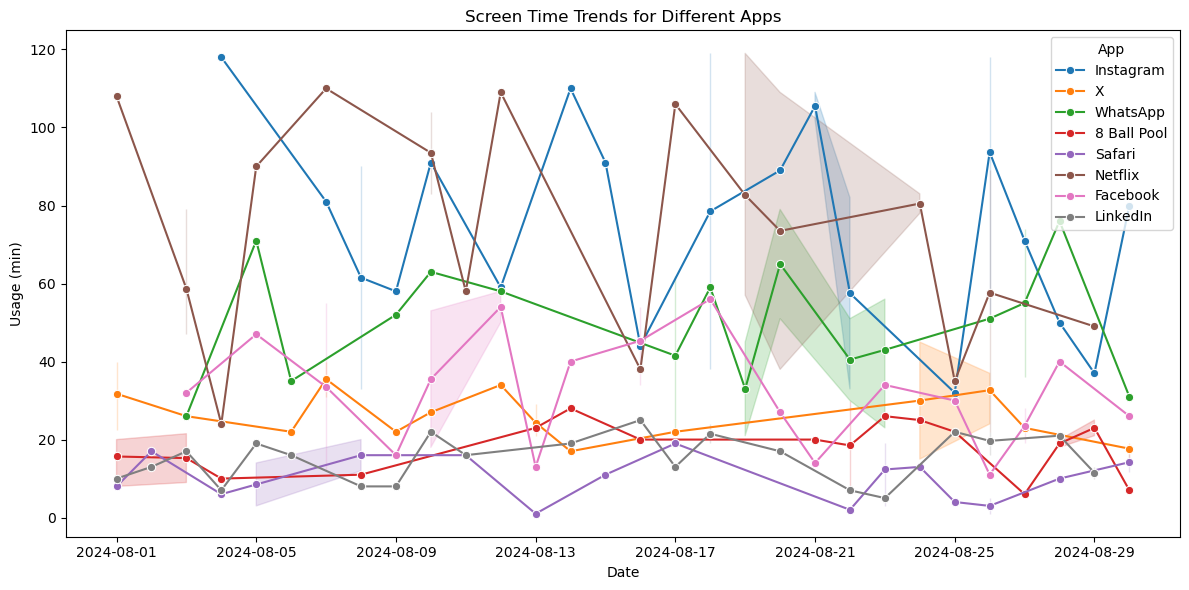

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Date', y='Usage (minutes)', hue='App', marker='o')
plt.title('Screen Time Trends for Different Apps')
plt.xlabel('Date')
plt.ylabel('Usage (min)')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

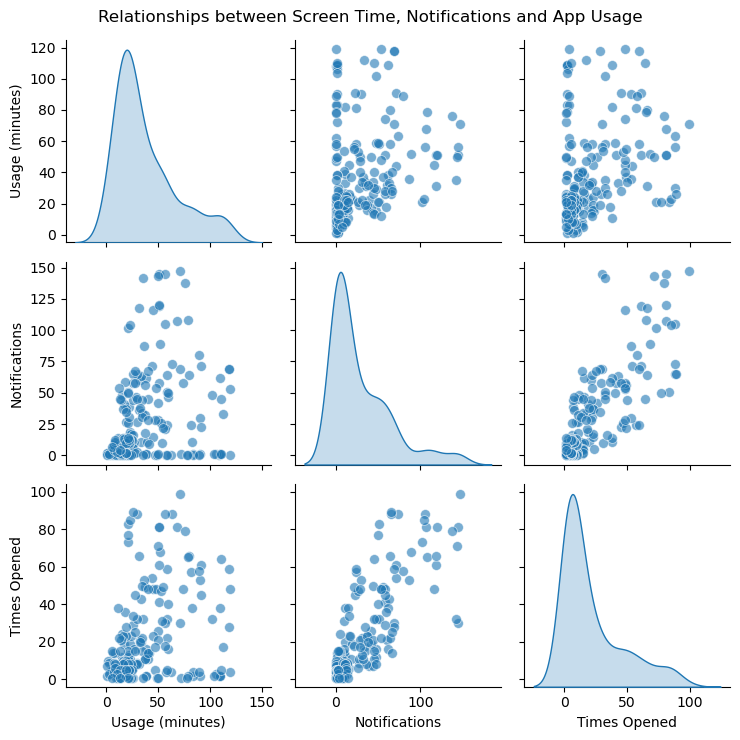

In [9]:
plt.figure(figsize=(12,6))

pairplot = sns.pairplot(data[['Usage (minutes)', 'Notifications', 'Times Opened']],
             kind='scatter',
             diag_kind='kde',
             plot_kws={'alpha':0.6, 's':50})
pairplot.fig.suptitle('Relationships between Screen Time, Notifications and App Usage')
plt.tight_layout()
plt.show()

### Top Apps based on Screen Time

In [11]:
top_apps = data.groupby('App').agg(
    avg_usage = ('Usage (minutes)', 'mean'),
    avg_notif = ('Notifications', 'mean'),
    avg_opened = ('Times Opened', 'mean')
).reset_index()

In [12]:
top_apps.sort_values(by='avg_usage', ascending=False)

,App,avg_usage,avg_notif,avg_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


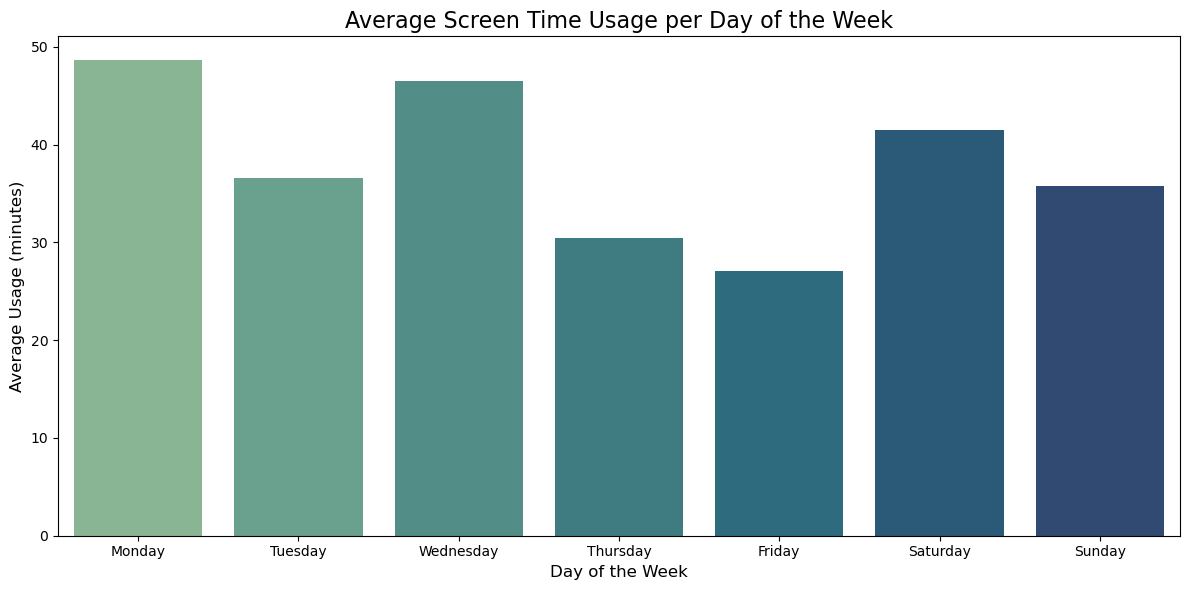

In [32]:
data['Day of Week'] = data['Date'].dt.day_name()

weekly_usage = data.groupby('Day of Week')['Usage (minutes)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette='crest', hue=weekly_usage.index)

plt.title('Average Screen Time Usage per Day of the Week', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### Daily App Patterns

In [15]:
top_apps_data = data[data['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]

daily_app_usage = top_apps_data.groupby(['App', 'Day of Week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram', 'Netflix', 'WhatsApp'], 
                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                               names=['App', 'Day of Week'])).reset_index()

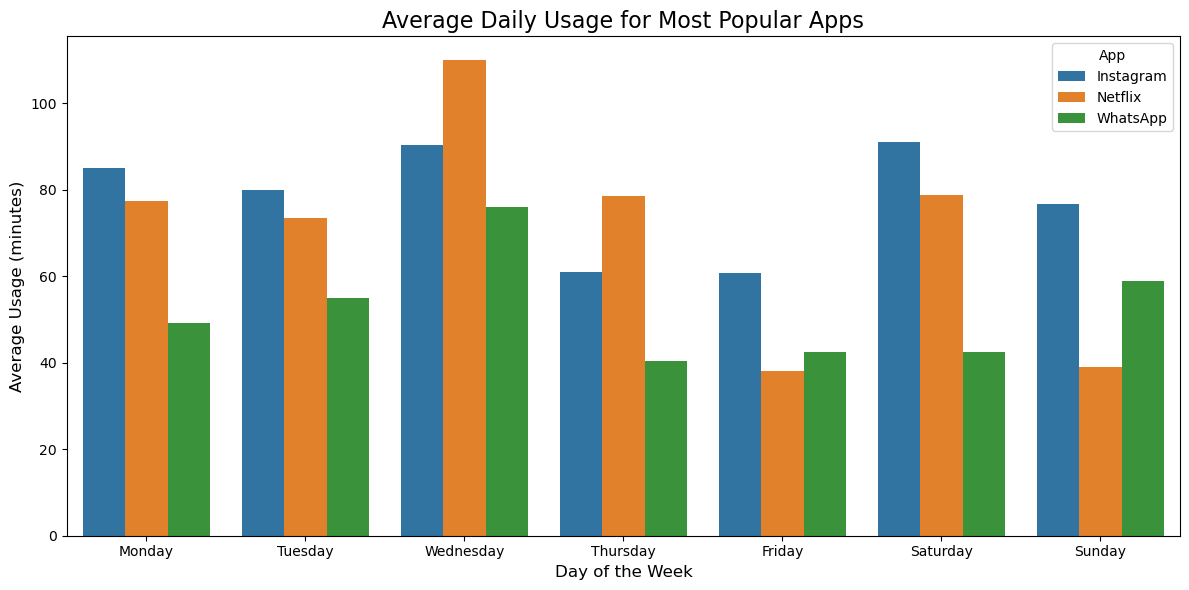

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day of Week', y='Usage (minutes)', hue='App', data=daily_app_usage)

plt.title('Average Daily Usage for Most Popular Apps', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()